In [5]:
import pandas as pd
df = pd.read_csv(r"C:\Users\USER\Downloads\Avocado.csv\Avocado.csv")
df = df.drop(columns=["Unnamed: 0", "Date", "type", "year", "region"])
print(df.head())


   AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  
0     8603.62       93.25          0.0  
1     9408.07       97.49          0.0  
2     8042.21      103.14          0.0  
3     5677.40      133.76          0.0  
4     5986.26      197.69          0.0  


In [6]:
import pandas as pd

df = pd.read_csv(r"C:\Users\USER\Downloads\Avocado.csv\Avocado.csv")
df = df.drop(columns=["Unnamed: 0", "Date", "type", "year", "region"])

mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]

stats_table = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values,
    "Mode": mode_values
})

print(stats_table)


                       Mean     Median     Mode
AveragePrice       1.405978       1.37     1.15
Total Volume  850644.013009  107376.76  2038.99
4046          293008.424531    8645.30     0.00
4225          295154.568356   29061.02     0.00
4770           22839.735993     184.99     0.00
Total Bags    239639.202060   39743.83     0.00
Small Bags    182194.686696   26362.82     0.00
Large Bags     54338.088145    2647.71     0.00
XLarge Bags     3106.426507       0.00     0.00


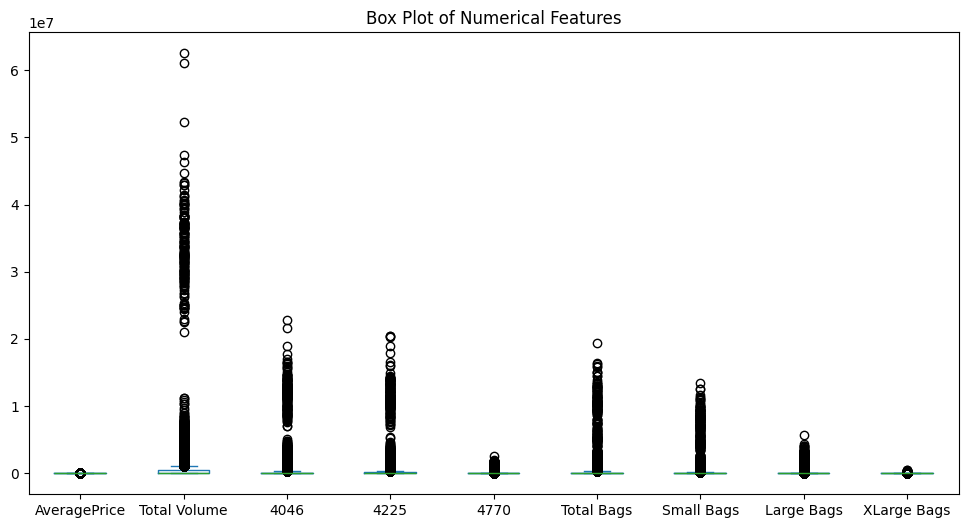

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\USER\Downloads\Avocado.csv\Avocado.csv")
df = df.drop(columns=["Unnamed: 0", "Date", "type", "year", "region"])

df.plot(kind="box", figsize=(12,6))
plt.title("Box Plot of Numerical Features")
plt.show()


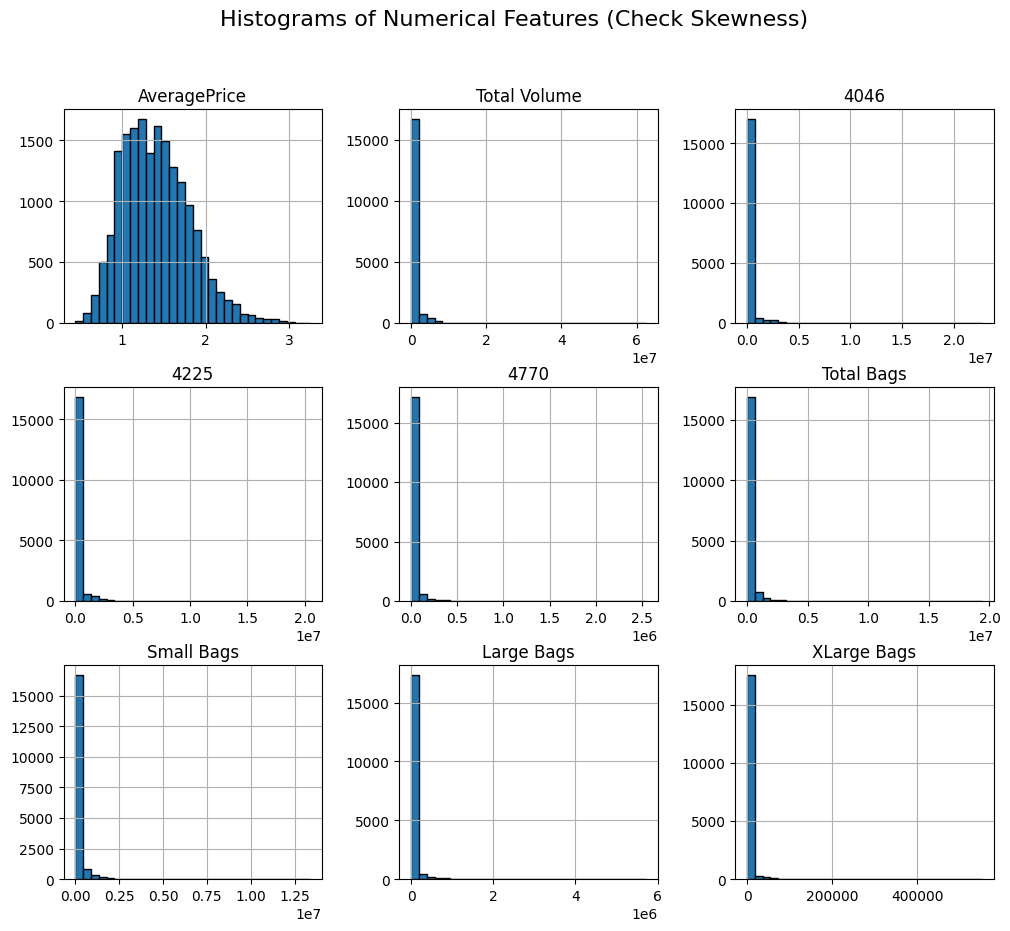

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\USER\Downloads\Avocado.csv\Avocado.csv")
df = df.drop(columns=["Unnamed: 0", "Date", "type", "year", "region"])

df.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features (Check Skewness)", fontsize=16)
plt.show()


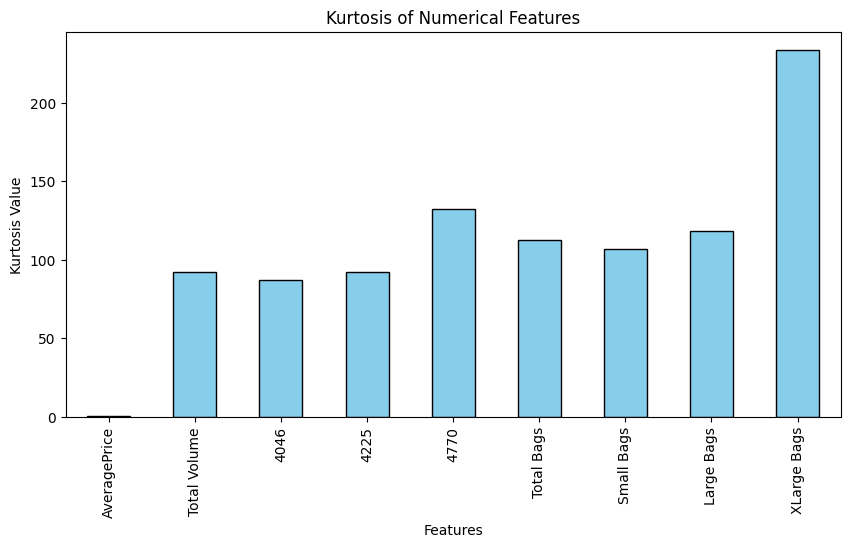

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\USER\Downloads\Avocado.csv\Avocado.csv")
df = df.drop(columns=["Unnamed: 0", "Date", "type", "year", "region"])

kurtosis = df.kurtosis()

plt.figure(figsize=(10,5))
kurtosis.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Kurtosis of Numerical Features")
plt.ylabel("Kurtosis Value")
plt.xlabel("Features")
plt.show()


In [10]:
import pandas as pd

df = pd.read_csv(r"C:\Users\USER\Downloads\Avocado.csv\Avocado.csv")
df = df.drop(columns=["Unnamed: 0", "Date", "type", "year", "region"])

kurtosis = df.kurtosis()

print("Kurtosis of Numerical Features:\n")
print(kurtosis)


Kurtosis of Numerical Features:

AveragePrice      0.325196
Total Volume     92.104458
4046             86.809113
4225             91.949022
4770            132.563441
Total Bags      112.272156
Small Bags      107.012885
Large Bags      117.999481
XLarge Bags     233.602612
dtype: float64


In [11]:
import pandas as pd

df = pd.read_csv(r"C:\Users\USER\Downloads\Avocado.csv\Avocado.csv")
df = df.drop(columns=["Unnamed: 0", "Date", "type", "year", "region"])

mean_values = df.mean()
median_values = df.median()
std_dev = df.std()

pearson_skewness = 3 * (mean_values - median_values) / std_dev

print("Pearson's Skewness (3*(Mean - Median)/Std Dev):\n")
print(pearson_skewness)


Pearson's Skewness (3*(Mean - Median)/Std Dev):

AveragePrice    0.268044
Total Volume    0.645656
4046            0.674385
4225            0.662957
4770            0.632437
Total Bags      0.608051
Small Bags      0.626520
Large Bags      0.635626
XLarge Bags     0.526724
dtype: float64


In [12]:
import pandas as pd
from scipy.stats import boxcox

df = pd.read_csv(r"C:\Users\USER\Downloads\Avocado.csv\Avocado.csv")
df = df.drop(columns=["Unnamed: 0", "Date", "type", "year", "region"])

boxcox_results = {}

for col in df.columns:
    if (df[col] > 0).all():  # Box-Cox requires strictly positive data
        transformed, lambda_val = boxcox(df[col])
        boxcox_results[col] = lambda_val
    else:
        boxcox_results[col] = "Not applicable (non-positive values)"

print(lambda_val)
print("Box-Cox λ (lambda) values for each feature:\n")
for k, v in boxcox_results.items():
    print(f"{k}: {v}")


-0.01829709277802757
Box-Cox λ (lambda) values for each feature:

AveragePrice: 0.23306748766278937
Total Volume: -0.01829709277802757
4046: Not applicable (non-positive values)
4225: Not applicable (non-positive values)
4770: Not applicable (non-positive values)
Total Bags: Not applicable (non-positive values)
Small Bags: Not applicable (non-positive values)
Large Bags: Not applicable (non-positive values)
XLarge Bags: Not applicable (non-positive values)


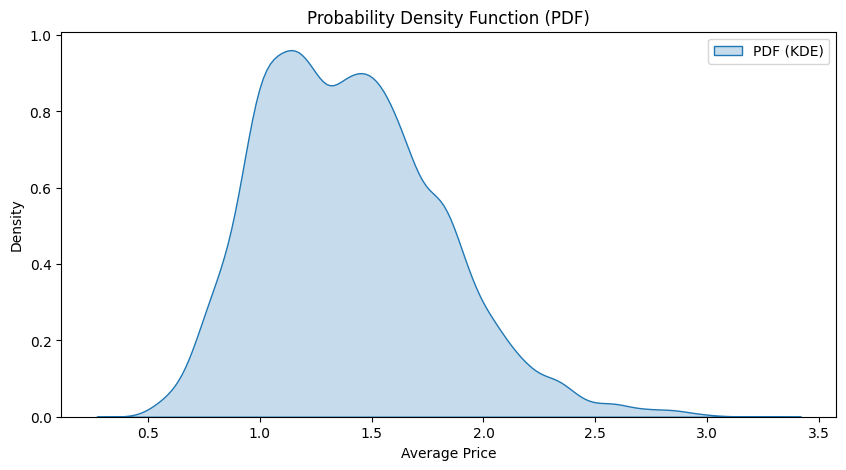

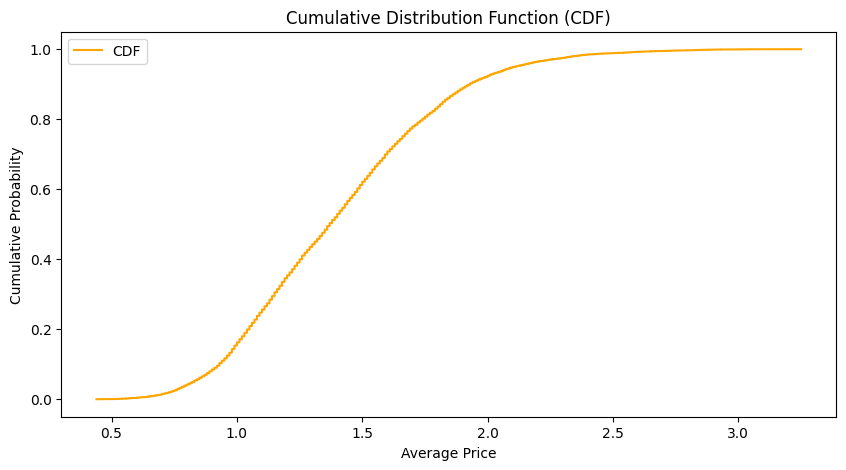

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

data = df["AveragePrice"].dropna()

plt.figure(figsize=(10, 5))
sns.kdeplot(data, fill=True, label="PDF (KDE)")
plt.title("Probability Density Function (PDF)")
plt.xlabel("Average Price")
plt.ylabel("Density")
plt.legend()
plt.show()

sorted_data = np.sort(data)
cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)

plt.figure(figsize=(10, 5))
plt.plot(sorted_data, cdf, label="CDF", color="orange")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Average Price")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()


In [3]:
import pandas as pd

# Load your avocado dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\Avocado.csv\Avocado.csv")

# (Optional) Drop unwanted columns if they exist
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
